In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

d = pd.read_csv("data.csv")

In [4]:
d.head()

,N,y,x,id
0,8,0,2,1
1,8,1,2,2
2,8,2,2,3
3,8,4,2,4
4,8,1,2,5


In [5]:
d.describe()

,N,y,x,id
count,100.0,100.000000,100.000000,100.000000
mean,8.0,3.810000,4.000000,50.500000
std,0.0,3.070534,1.421338,29.011492
min,8.0,0.000000,2.000000,1.000000
25%,8.0,1.000000,3.000000,25.750000
50%,8.0,3.000000,4.000000,50.500000
75%,8.0,7.000000,5.000000,75.250000
max,8.0,8.000000,6.000000,100.000000


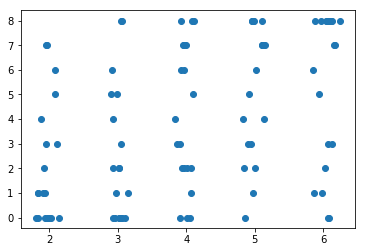

In [6]:
# そのまま散布図にすると点が重なってしまい数の多さがわからないため、
# 正規分布のズレを加えている。
d["x_bure"] = np.random.normal(loc=0,scale=0.1,size=100)
plt.scatter(d.x+d.x_bure,d.y)

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm('y + I(N-y)~ x',data=d,family=sm.families.Binomial())

In [8]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -322.80
Date:                Wed, 04 Apr 2018   Deviance:                       513.84
Time:                        11:06:20   Pearson chi2:                     53.5
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1487      0.237     -9.057      0.000      -2.614      -1.684
x              0.5104      0.056      9.179      0.000       0.401       0.619
==============================================================================
"""

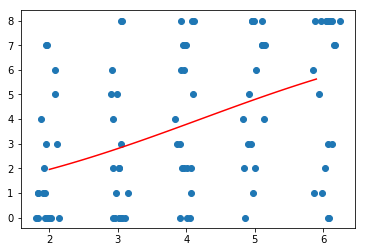

In [9]:
df_test = pd.DataFrame()
df_test["x"]=np.arange(2,6,0.1)
plt.scatter(d.x+d.x_bure,d.y)
plt.plot(df_test.x,result.predict(df_test)*8,c="red")

In [10]:
d[d.x == 4].groupby([d.y]).count()["N"]

y
0    3
1    1
2    4
3    2
4    1
5    1
6    2
7    3
8    3
Name: N, dtype: int64

In [12]:
d_4 = pd.DataFrame()
d_4 = d[d.x==4]

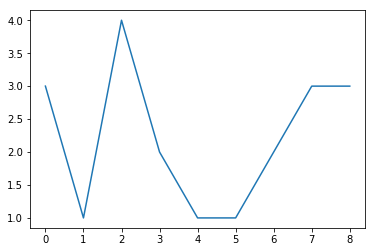

In [13]:
plt.plot(d[d.x == 4].groupby([d.y]).count()["N"].index,d[d.x == 4].groupby([d.y]).count()["N"].values)

In [14]:
d_4.head()

,N,y,x,id,x_bure
40,8,6,4,41,-0.077510
41,8,2,4,42,-0.039534
42,8,0,4,43,0.052400
43,8,5,4,44,0.096664
44,8,6,4,45,-0.031945


In [15]:
d_4.y.describe()

count    20.000000
mean      4.050000
std       2.892367
min       0.000000
25%       2.000000
50%       3.500000
75%       7.000000
max       8.000000
Name: y, dtype: float64

In [16]:
d_4.y.describe()["std"]**2

8.365789473684213